## Radardata inspection
To transform the Radardata to PNGs, the Radardata has to be analysed. The transformation will cause a loss of information. This loss must be brought to an acceptable level.  

Therfore the data of June 2016 gets alayzed.

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
uniqueValues = np.asanyarray(pickle.load(open("YW2017.002_201606_countUniqueValues.p", "rb")))
uniqueValues_larger_0 = np.asanyarray([value for value in uniqueValues if value[0] > 0])
print(uniqueValues[0])

[-9.99900000e+03  3.39208052e+09]


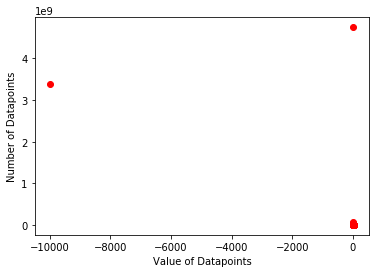

In [3]:
plt.plot(uniqueValues[:,0], uniqueValues[:,1], 'ro')
plt.ylabel('Number of Datapoints')
plt.xlabel('Value of Datapoints')
plt.show()

This plot shows, that two values are much more common than the rest. 
These values are: 

-9999 (no data available) 
0 (no rain) 

These values are filtered in the next plot

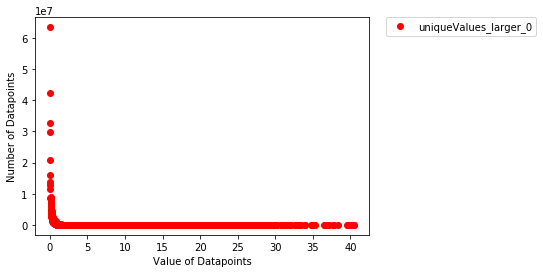

In [4]:
plt.plot(uniqueValues_larger_0[:,0], uniqueValues_larger_0[:,1], 'ro', label= "uniqueValues_larger_0")
plt.ylabel('Number of Datapoints')
plt.xlabel('Value of Datapoints')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [5]:
val = 0
number_of_values = 0
for value in uniqueValues_larger_0:
    val = val + value[1]*value[0]
    number_of_values = number_of_values + value[1]

mean = val/number_of_values
print("Meanvalue: ", mean)

Meanvalue:  0.17437906142145151


In [6]:
def get_percentile(number):
    '''
    This function calculates the percentile of the Radardata
    0 < number < 1
    '''
    index = int(number*number_of_values)
    for value in uniqueValues_larger_0:
        index = index-int(value[1])
        if index <= 0:
            return value[0]

Calculate and Plot 10 percentiles 

In [7]:
percentiles = []
for number in range(1,5):
    percentiles.append(get_percentile(number*2/10))
percentiles

[0.02, 0.05, 0.1, 0.25]

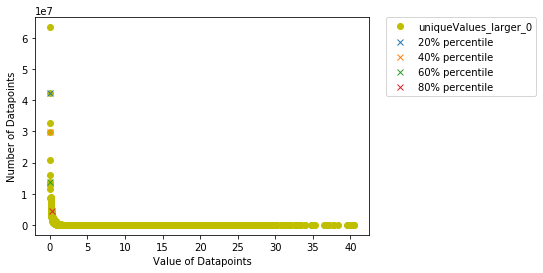

In [8]:
plt.plot(uniqueValues_larger_0[:,0], uniqueValues_larger_0[:,1], 'yo', label= "uniqueValues_larger_0")
for value in uniqueValues_larger_0:
    if value[0] in percentiles:
        num_percentile = percentiles.index(value[0])
        plt.plot(value[0],value[1], 'x', label= (str((num_percentile+1)*2*10) + "% percentile"))
plt.ylabel('Number of Datapoints')
plt.xlabel('Value of Datapoints')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

99% Percentile:  1.3900000000000001


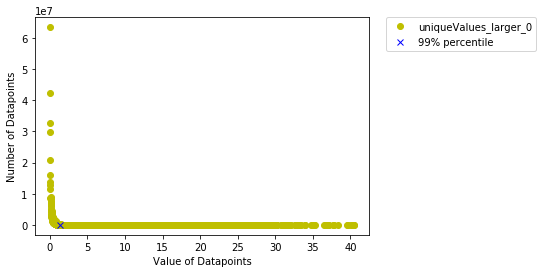

In [9]:
percentile99 = get_percentile(0.99)
print("99% Percentile: ", percentile99)
plt.plot(uniqueValues_larger_0[:,0], uniqueValues_larger_0[:,1], 'yo', label= "uniqueValues_larger_0")
for value in uniqueValues_larger_0:
    if value[0] == percentile99:
        plt.plot(value[0],value[1], 'bx', label= "99% percentile")
plt.ylabel('Number of Datapoints')
plt.xlabel('Value of Datapoints')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [10]:
percent_of_data99 = []
for value in uniqueValues_larger_0:
    if value[0] <= percentile99:
        percent_of_data99.append(value)
    else:
        break
        
print("99% of the data which is >0 are ", len(percent_of_data99), " different values")
print("Precise number: ", sum(np.asanyarray(percent_of_data99)[:,1])/number_of_values)
print("0 is needed for the 0 values. This means we have a range of 255-", len(percent_of_data99), "for the rest of tthe data")
remaining_range = 255-len(percent_of_data99)
print("Range: ", remaining_range)

99% of the data which is >0 are  138  different values
Precise number:  0.9900309891659714
0 is needed for the 0 values. This means we have a range of 255- 138 for the rest of tthe data
Range:  117


The Data which hast to stored with the remaining Range hast the following distribution
Percentile:  1.3900000000000001


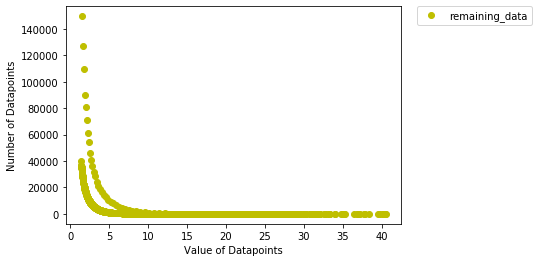

In [11]:
print("The Data which hast to stored with the remaining Range hast the following distribution")

percentile99 = get_percentile(0.99)
print("Percentile: ", percentile99)

remaining_data=np.asanyarray([value for value in uniqueValues_larger_0 if value[0]>percentile99])
plt.plot(remaining_data[:,0], remaining_data[:,1], 'yo', label= "remaining_data")
plt.ylabel('Number of Datapoints')
plt.xlabel('Value of Datapoints')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

A possible scaling, with the largest value_number 21.39 would look like this:


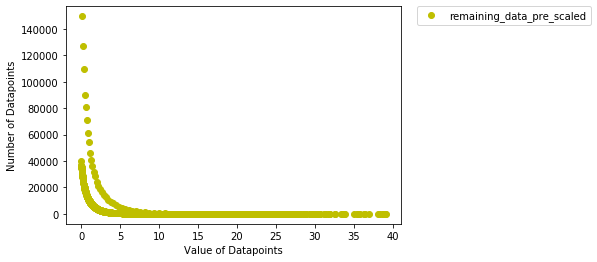

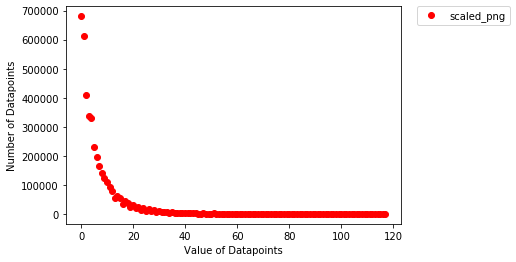

Recoverd Data:
[20.0, 272.0]
[19.82905982905983, 17.0]


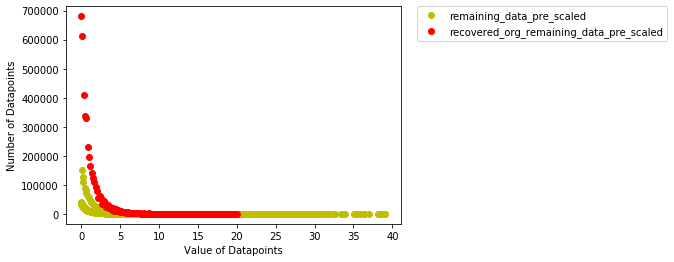

In [12]:
larges_value = 20
print("A possible scaling, with the largest value_number", larges_value+percentile99, "would look like this:")

scale_factor = remaining_range/(larges_value)
remaining_data_pre_scaled = remaining_data.copy()
remaining_data_pre_scaled[:,0] = remaining_data_pre_scaled[:,0]-percentile99

scaled_png =[]
scaled_radar=[]
for value in remaining_data_pre_scaled:
    scaled_radar.append(value)
    scaled_png_val = int(value[0]*scale_factor)
    if scaled_png_val > remaining_range:
        scaled_png_val = remaining_range
    scaled_png.append([scaled_png_val, value[1]])
    
unique_values_png = np.unique(np.asanyarray(scaled_png)[:,0])

final_scaled_png = []
for unique_value_png in unique_values_png:
    number_of_datapoints = 0
    for value in scaled_png:
        if value[0] == unique_value_png:
            number_of_datapoints += value[1]
    final_scaled_png.append([unique_value_png, int(number_of_datapoints)])
final_scaled_png = np.asanyarray(final_scaled_png)   

# remaining data
plt.plot(remaining_data_pre_scaled[:,0], remaining_data_pre_scaled[:,1], 'yo', label= "remaining_data_pre_scaled")
plt.ylabel('Number of Datapoints')
plt.xlabel('Value of Datapoints')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# remaining data 
plt.plot(final_scaled_png[:,0], final_scaled_png[:,1], 'ro', label= "scaled_png")
plt.ylabel('Number of Datapoints')
plt.xlabel('Value of Datapoints')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


recovered_org_remaining_data_pre_scaled = []
for value in final_scaled_png:
    recovered_org_remaining_data_pre_scaled.append([value[0]/scale_factor, value[1]])

print("Recoverd Data:")
print(recovered_org_remaining_data_pre_scaled[len(recovered_org_remaining_data_pre_scaled)-1])
print(recovered_org_remaining_data_pre_scaled[len(recovered_org_remaining_data_pre_scaled)-2])
recovered_org_remaining_data_pre_scaled = np.asanyarray(recovered_org_remaining_data_pre_scaled)

# recovered org data  
plt.plot(remaining_data_pre_scaled[:,0], remaining_data_pre_scaled[:,1], 'yo', label= "remaining_data_pre_scaled")
plt.plot(recovered_org_remaining_data_pre_scaled[:,0], recovered_org_remaining_data_pre_scaled[:,1], 'ro', label= "recovered_org_remaining_data_pre_scaled")

plt.ylabel('Number of Datapoints')
plt.xlabel('Value of Datapoints')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


### Old convert algorithm 

The following plots show the old convert algorithm

Original Rain Data 
Values <=0 are filtered out 


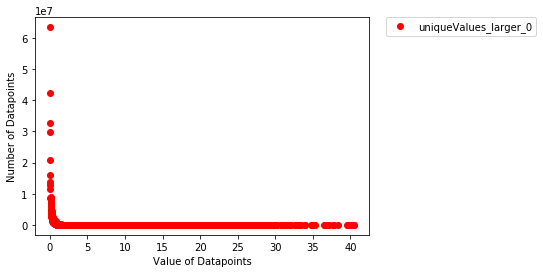

For the conversion a max value of 80 is used


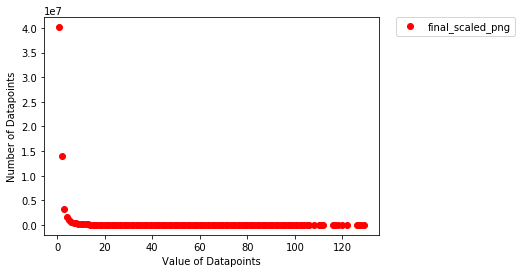

Recoverd Data:


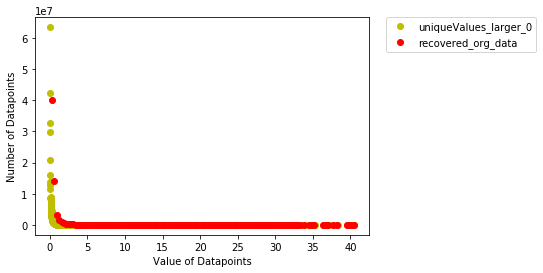

The original number of postivive values was 412167272.0 
The recoverd number is 62413250.0 
 15.142699151523123 % of Datapoints could been recovered (quantitatively)


In [13]:
print("Original Rain Data \nValues <=0 are filtered out ")
plt.plot(uniqueValues_larger_0[:,0], uniqueValues_larger_0[:,1], 'ro', label= "uniqueValues_larger_0")
plt.ylabel('Number of Datapoints')
plt.xlabel('Value of Datapoints')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

max_val = 80
scale_factor = 255/max_val
print("For the conversion a max value of", max_val, "is used")
scaled_png = []
for value in uniqueValues_larger_0:
    scaled_png.append([int(value[0]*scale_factor), value[1]])

# find unique vals and yount them 
unique_values_png = np.unique(np.asanyarray(scaled_png)[:,0])

final_scaled_png = []
for unique_value_png in unique_values_png:
    number_of_datapoints = 0
    for value in scaled_png:
        if value[0] == unique_value_png:
            number_of_datapoints += value[1]
    if(unique_value_png>0):
        final_scaled_png.append([unique_value_png, int(number_of_datapoints)])
final_scaled_png = np.asanyarray(final_scaled_png) 

plt.plot(final_scaled_png[:,0], final_scaled_png[:,1], 'ro', label= "final_scaled_png")
plt.ylabel('Number of Datapoints')
plt.xlabel('Value of Datapoints')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

recovered_org_data = []
for value in final_scaled_png:
    recovered_org_data.append([value[0]/scale_factor, value[1]])

print("Recoverd Data:")
recovered_org_data = np.asanyarray(recovered_org_data)

# recovered org data  
plt.plot(uniqueValues_larger_0[:,0], uniqueValues_larger_0[:,1], 'yo', label= "uniqueValues_larger_0")
plt.plot(recovered_org_data[:,0], recovered_org_data[:,1], 'ro', label= "recovered_org_data")
plt.ylabel('Number of Datapoints')
plt.xlabel('Value of Datapoints')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

org_num_of_pos_val = sum(uniqueValues_larger_0[:,1])
recoverd_num_of_pos_val = sum(recovered_org_data[:,1])

print("The original number of postivive values was", org_num_of_pos_val,
      "\nThe recoverd number is", recoverd_num_of_pos_val,"\n", recoverd_num_of_pos_val/org_num_of_pos_val*100,
      "% of Datapoints could been recovered (quantitatively)")

### New convert algorithm 

The following plots show the new convert algorithm

Original Rain Data 
Values <=0 are filtered out 


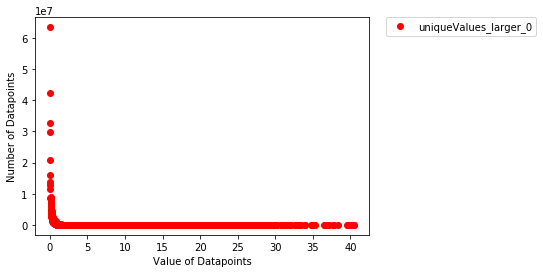

99% of the data which is >0 are  139  different values
Precise % number:  0.9901268483054132
0 is needed for the 0 values. This means we have a range of 255- 139 for the rest of the data
Range:  116
A possible scaling, with the largest value_number 21.39 would look like this:
[255. 289.]
[254.   8.]


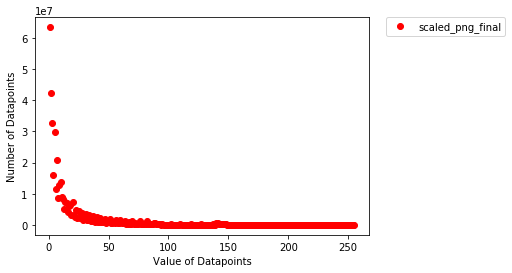

[ 21.39 289.  ]
[21.21758621  8.        ]


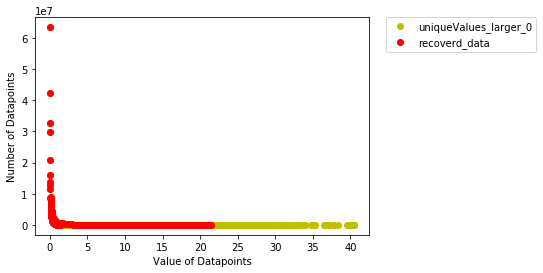

The original number of postivive values was 412167272.0 
The recoverd number is 412167272.0 100.0 % of Datapoints could been recovered (quantitatively)


In [17]:
print("Original Rain Data \nValues <=0 are filtered out ")
plt.plot(uniqueValues_larger_0[:,0], uniqueValues_larger_0[:,1], 'ro', label= "uniqueValues_larger_0")
plt.ylabel('Number of Datapoints')
plt.xlabel('Value of Datapoints')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


#convert the values
percentile99 = get_percentile(0.99)
percent_of_data99 = []
for value in uniqueValues_larger_0:
    if value[0] <= percentile99:
        percent_of_data99.append(value)
        
        
pickle.dump( percent_of_data99, open("RadarValues99PercentDatapoints.p", "wb"))
print("99% of the data which is >0 are ", len(percent_of_data99), " different values")
print("Precise % number: ", sum(np.asanyarray(percent_of_data99)[:,1])/number_of_values)
print("0 is needed for the 0 values. This means we have a range of 255-", len(percent_of_data99), 
      "for the rest of the data")
remaining_range = 255-len(percent_of_data99)
print("Range: ", remaining_range)
percent_of_data99 = np.asanyarray(percent_of_data99)

larges_value = 20
print("A possible scaling, with the largest value_number", larges_value+percentile99, "would look like this:")

scale_factor = remaining_range/(larges_value)

scaled_png_final = []
scaled_png = []
for value in uniqueValues_larger_0:
    if value[0] in percent_of_data99[:,0]:       
        scaled_png_final.append([percent_of_data99[:,0].tolist().index(value[0])+1, value[1]])
    else:
        scaled_value = int((value[0]-percentile99)*scale_factor)+len(percent_of_data99)+1
        if scaled_value > 255:
            scaled_value = 255    
        scaled_png.append([scaled_value, value[1]])
        
                
unique_values_scaled_png = np.unique(np.asanyarray(scaled_png)[:,0])

for unique_value_png in unique_values_scaled_png:
    number_of_datapoints = 0
    for value in scaled_png:
        if value[0] == unique_value_png:
            number_of_datapoints += value[1]
    scaled_png_final.append([unique_value_png, int(number_of_datapoints)])
scaled_png_final = np.asanyarray(scaled_png_final)   


print(scaled_png_final[-1])
print(scaled_png_final[-2])
#Plot converted Values
plt.plot(scaled_png_final[:,0], scaled_png_final[:,1], 'ro', label= "scaled_png_final")
plt.ylabel('Number of Datapoints')
plt.xlabel('Value of Datapoints')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

recoverd_data = []
#recover org data
for value in scaled_png_final:
    if value[0] in range(1, len(percent_of_data99)+1):
        recoverd_data.append([percent_of_data99[int(value[0]-1)][0], value[1]])
    else:
        recoverd_data.append([(value[0]-len(percent_of_data99))/(scale_factor) +percentile99, value[1]])
        
recoverd_data = np.asanyarray(recoverd_data)  

org_num_of_pos_val = sum(uniqueValues_larger_0[:,1])
recoverd_num_of_pos_val = sum(recoverd_data[:,1])

print(recoverd_data[-1])
print(recoverd_data[-2])
plt.plot(uniqueValues_larger_0[:,0], uniqueValues_larger_0[:,1], 'yo', label= "uniqueValues_larger_0")
plt.plot(recoverd_data[:,0], recoverd_data[:,1], 'ro', label= "recoverd_data")
plt.ylabel('Number of Datapoints')
plt.xlabel('Value of Datapoints')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


print("The original number of postivive values was", org_num_of_pos_val,
      "\nThe recoverd number is", recoverd_num_of_pos_val, recoverd_num_of_pos_val/org_num_of_pos_val*100,
      "% of Datapoints could been recovered (quantitatively)")

